In [1]:
!pip install --user matplotlib pandas numpy scipy sklearn

    100% |████████████████████████████████| 15.0MB 56kB/s eta 0:00:01   40% |█████████████                   | 6.1MB 494kB/s eta 0:00:18
    100% |████████████████████████████████| 49.6MB 17kB/s eta 0:00:01    30% |█████████▉                      | 15.2MB 769kB/s eta 0:00:45    58% |██████████████████▋             | 28.8MB 415kB/s eta 0:00:51    79% |█████████████████████████▌      | 39.5MB 407kB/s eta 0:00:25    85% |███████████████████████████▌    | 42.6MB 351kB/s eta 0:00:21
    100% |████████████████████████████████| 12.2MB 77kB/s eta 0:00:01   16% |█████▏                          | 2.0MB 348kB/s eta 0:00:30
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/b10317053/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests
from io import BytesIO

iris_url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
resp = requests.get(iris_url)
print(resp.content)

data = BytesIO(resp.content)

b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3,1.4,0.1,setosa\n4.3,3,1.1,0.1,setosa\n5.8,4,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5,3,1.6,0.2,setosa\n5,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3,1.3,0.2,setosa\n5.1,3.4,1.5,0.2,setosa\n5,3

In [6]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv(data)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
print(df.head()['sepal_length'])

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64


In [8]:
print(df.iloc[0])

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [9]:
target = df[df.columns[-1]]
target = target.astype('category')
numeric_data = df._get_numeric_data()
print(target.head())
print(numeric_data.head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [11]:
print(target.cat.codes[0:5])
training_data, testing_data, training_label, testing_label = train_test_split(numeric_data, target.cat.codes)

print('training_data')
print(training_data.head())

print(len(training_data))
print(len(testing_data))

0    0
1    0
2    0
3    0
4    0
dtype: int8
training_data
     sepal_length  sepal_width  petal_length  petal_width
85            6.0          3.4           4.5          1.6
146           6.3          2.5           5.0          1.9
141           6.9          3.1           5.1          2.3
70            5.9          3.2           4.8          1.8
14            5.8          4.0           1.2          0.2
112
38


In [13]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(training_data, training_label)

print(tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [15]:
predict_result = tree_model.predict(testing_data)
score_result = tree_model.predict_proba(testing_data)

print(predict_result[0:5])
print(score_result[0:5])

[0 2 2 1 0]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]


In [21]:
matrix = confusion_matrix(testing_label, predict_result)
report = classification_report(testing_label, predict_result, target_names = target.cat.categories)
acc = accuracy_score(testing_label, predict_result)

print(matrix)
print('=======')
print(report)
print('=======')
print(acc)

[[14  0  0]
 [ 0 11  0]
 [ 0  1 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.92      1.00      0.96        11
  virginica       1.00      0.92      0.96        13

avg / total       0.98      0.97      0.97        38

0.973684210526


Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


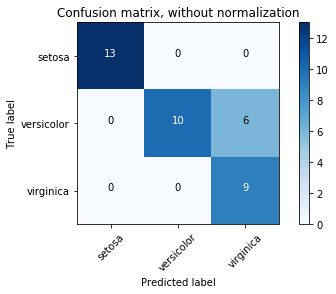

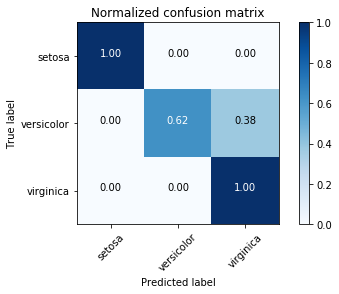

In [20]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[14  0  0]
 [ 0 11  0]
 [ 0  1 12]]


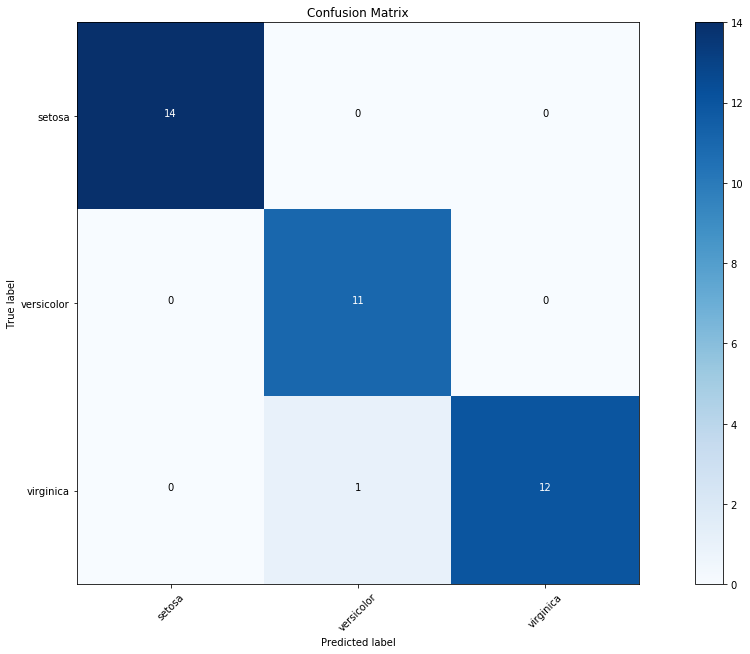

In [23]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure(figsize=(16,9))
plot_confusion_matrix(matrix, classes=target.cat.categories, title='Confusion Matrix')